# "Imagine data as a raw gem, full of potential yet requiring refinement. In this notebook, we embark on a journey to transform this unpolished gem into a polished jewel of insights. By meticulously cleaning the data, exploring its hidden patterns, and carefully tuning our models, we aim to unveil the true value within. Join me as we refine and craft data into powerful knowledge, ready to drive impactful decisions and discoveries."

# "Welcome to this guided exploration of data science! In this notebook, I'll walk you through each step of the process as we transform raw data into actionable insights. Here’s what we’ll cover:

1. **Data Cleaning:** Learn how to handle missing values and preprocess the data to prepare it for analysis.
2. **Feature Engineering:** Explore techniques to create and optimize features that enhance model performance.
3. **Model Selection:** Understand how to evaluate various machine learning models to find the best fit for our data.
4. **Hyperparameter Optimization:** See how to fine-tune model parameters using GridSearchCV or RandomizedSearchCV for optimal results.
5. **Final Model Training:** Train the selected model with the best parameters and understand the training process.

Throughout this journey, my goal is to not only show you the technical steps but also to share insights and best practices that will help you become proficient in data science. Let’s dive in and uncover the potential within our data together!"

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data Reading

In [2]:
data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
original_data = data.copy() #Saving the Original data

In [4]:
df = data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


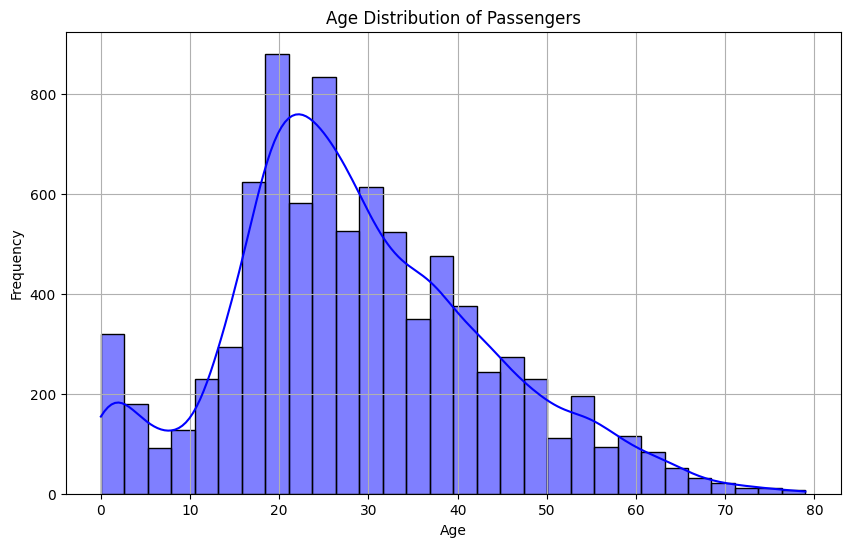

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

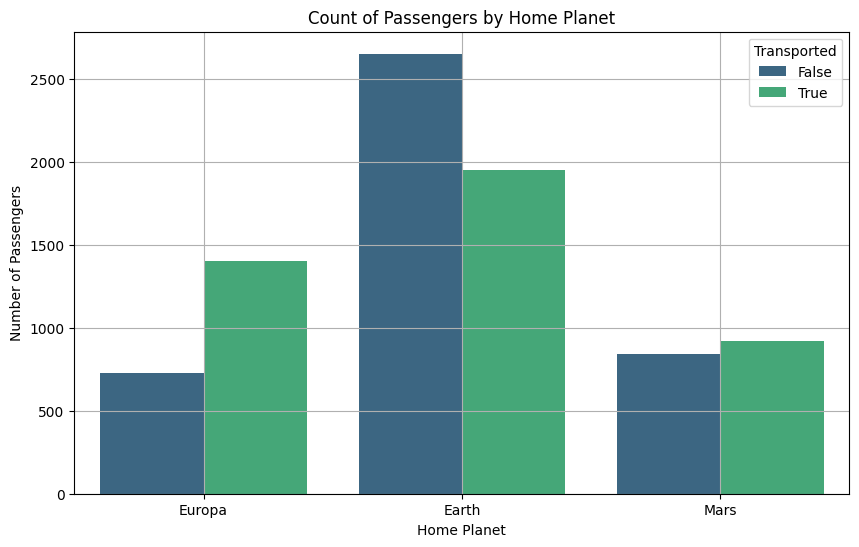

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HomePlanet',hue = 'Transported', palette='viridis',)
plt.title('Count of Passengers by Home Planet')
plt.xlabel('Home Planet')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


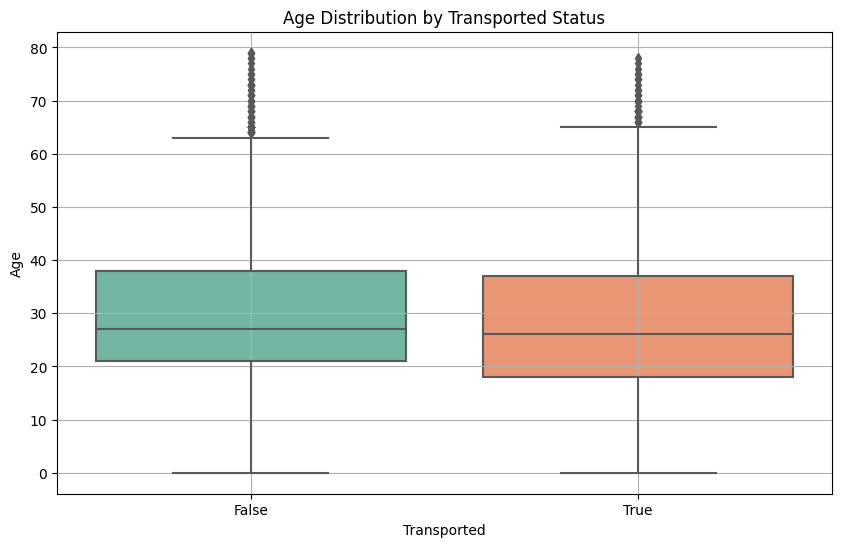

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Transported' , y='Age' , palette='Set2')
plt.title('Age Distribution by Transported Status')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.grid(True)
plt.show()

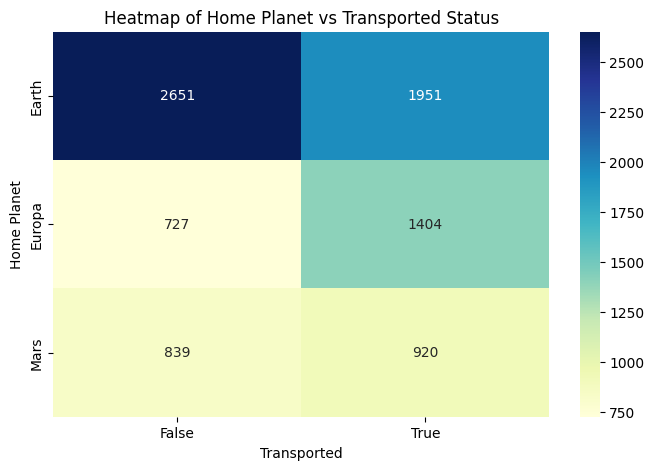

In [11]:
# Create a pivot table for heatmap
pivot_table = df.pivot_table(index = 'HomePlanet' , columns = 'Transported' , values = 'PassengerId' ,aggfunc = "count")

plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Home Planet vs Transported Status')
plt.xlabel('Transported')
plt.ylabel('Home Planet')
plt.show()


In [12]:
#Extract Deck and Side of Cabin 
df['Deck'] = df.Cabin.str[0]
df['Side'] = df.Cabin.str[-1]

In [13]:
test['Deck'] = test.Cabin.str[0]
test['Side'] = test.Cabin.str[-1]

In [14]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


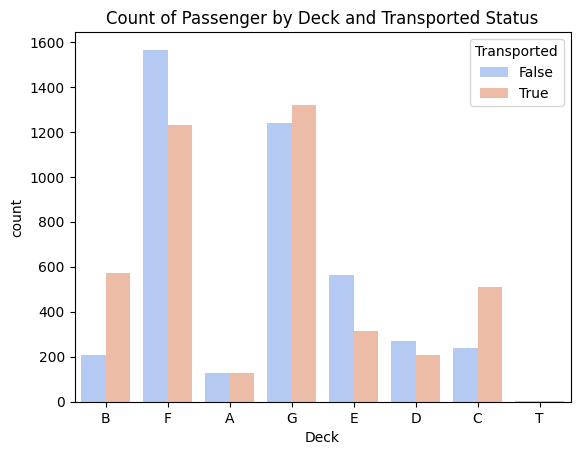

In [15]:
#PLot Count of Deck 
sns.countplot(data=df , x='Deck' , hue = 'Transported' ,palette='coolwarm')
plt.title('Count of Passenger by Deck and Transported Status')
plt.show()

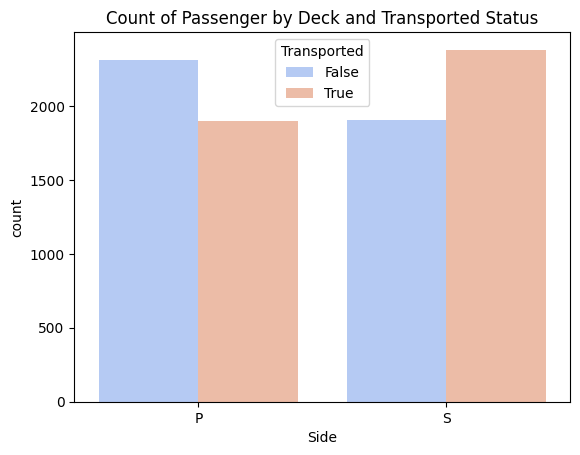

In [16]:
#PLot Count of Deck 
sns.countplot(data=df , x='Side' , hue = 'Transported' ,palette='coolwarm')
plt.title('Count of Passenger by Deck and Transported Status')
plt.show()

In [17]:
# Creating New Column for Total Spends
df['Total_Spends'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis = 1)

In [18]:
# Creating New Column for Total Spends
test['Total_Spends'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis = 1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

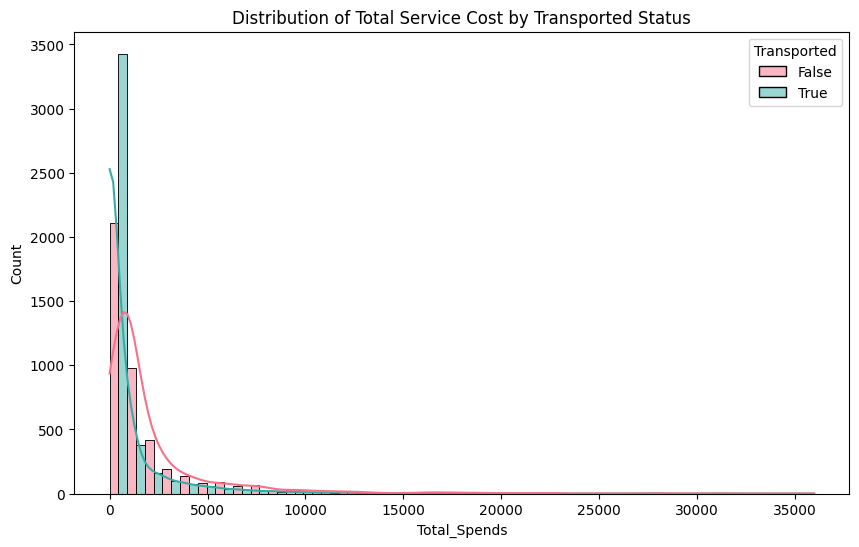

In [19]:
# Plot distribution of total service cost by transported status
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Total_Spends', hue='Transported', bins=40, kde=True, palette='husl',multiple = "dodge")
plt.title('Distribution of Total Service Cost by Transported Status')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

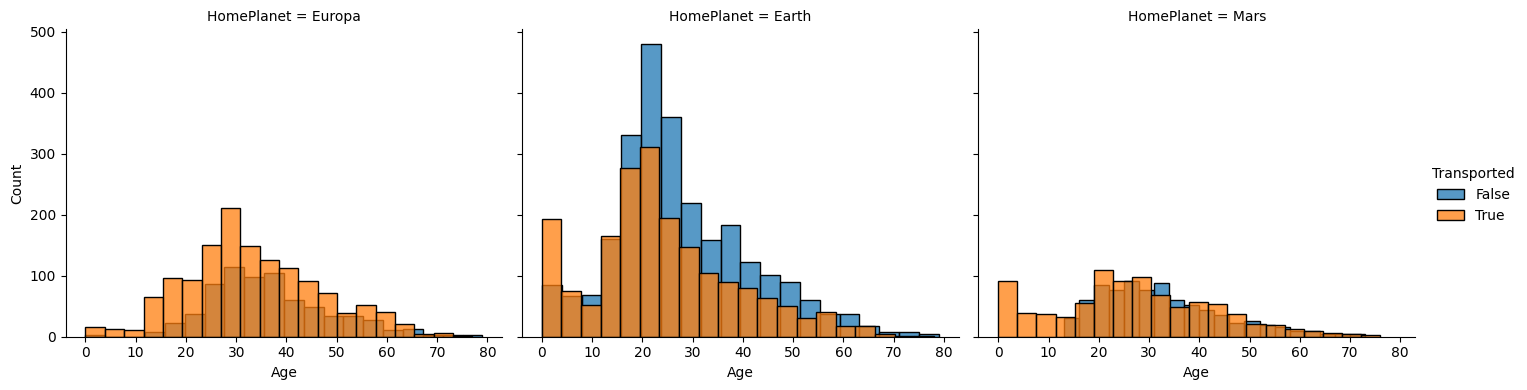

In [20]:
# Facet grid for HomePlanet, Age, and Transported status
g = sns.FacetGrid(df, col="HomePlanet", hue="Transported", height=4, aspect=1.2)
g.map(sns.histplot, 'Age', bins=20, kde=False)
g.add_legend()
plt.show()

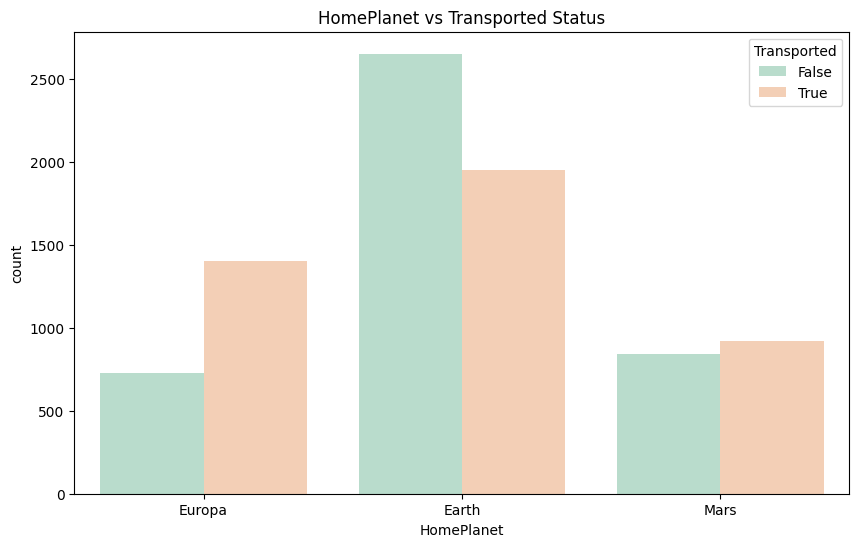

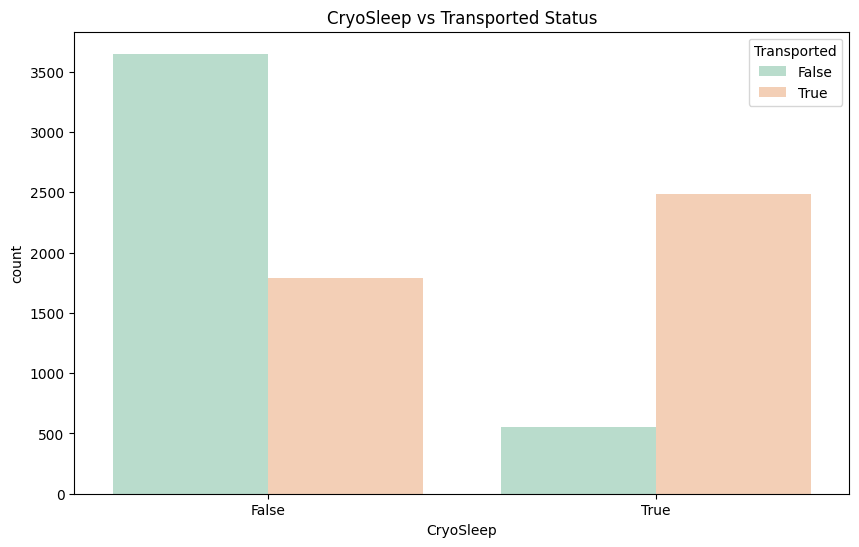

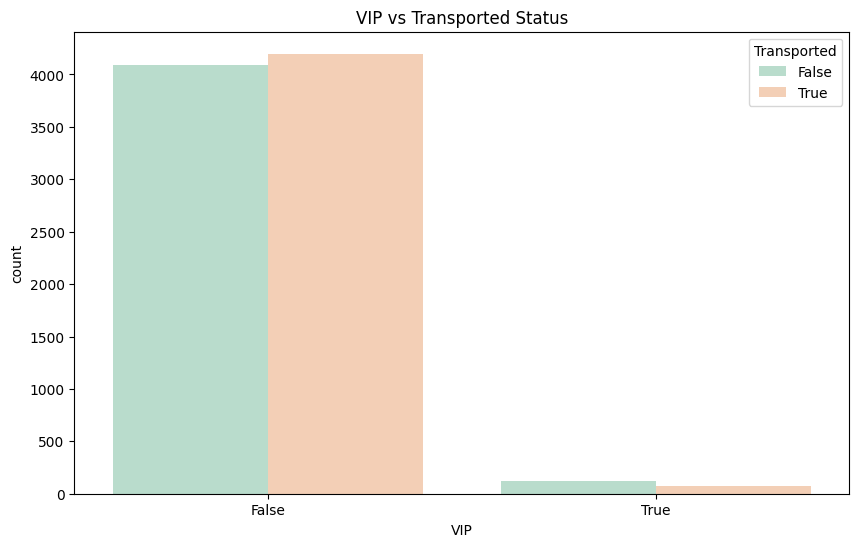

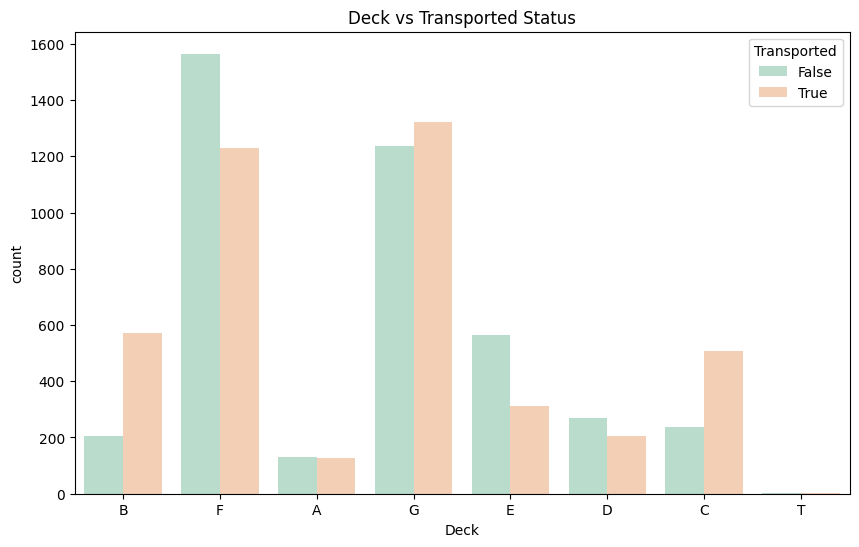

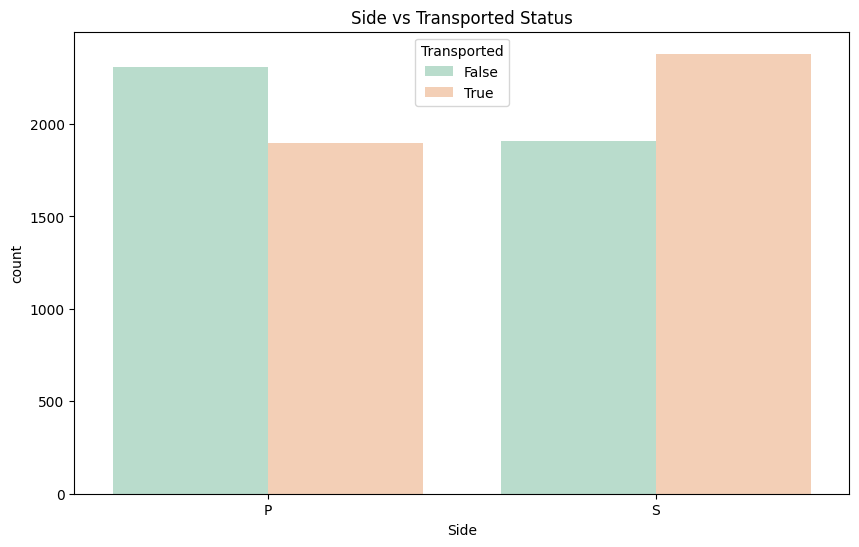

In [21]:
# Create a bar plot for categorical features and transported status
categorical_features = ['HomePlanet', 'CryoSleep', 'VIP', 'Deck', 'Side']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Transported', palette='Pastel2')
    plt.title(f'{feature} vs Transported Status')
    plt.show()

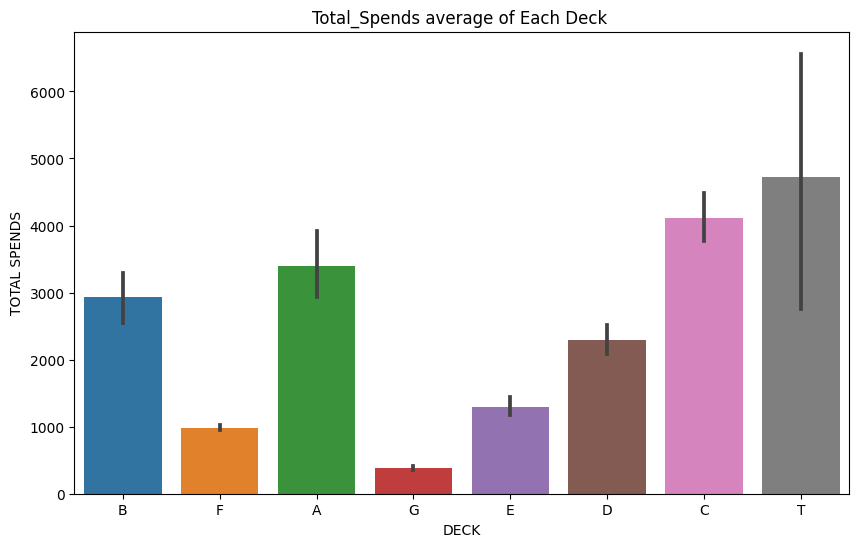

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df , x='Deck', y='Total_Spends')
plt.title("Total_Spends average of Each Deck ")
plt.xlabel('DECK')
plt.ylabel('TOTAL SPENDS')
plt.show()

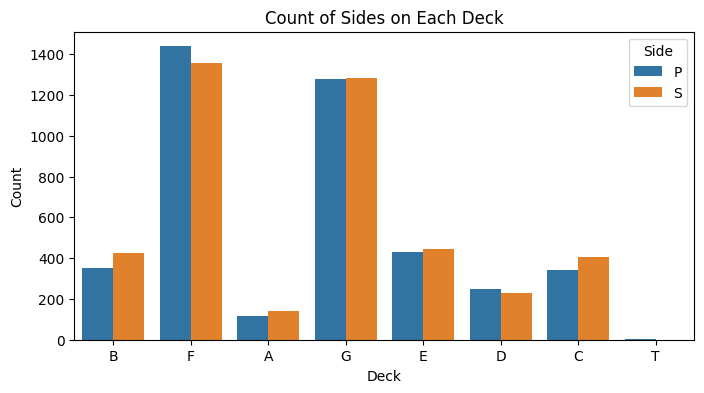

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df , x='Deck' , hue = 'Side')
plt.title('Count of Sides on Each Deck' )
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Total Spends On Each Sides')

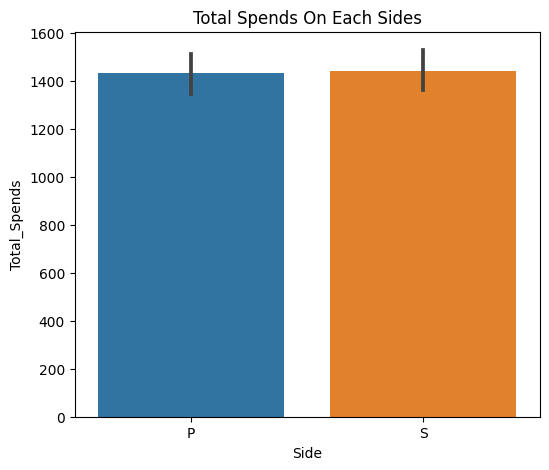

In [24]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df , y='Total_Spends' , x = 'Side' )
plt.title('Total Spends On Each Sides')

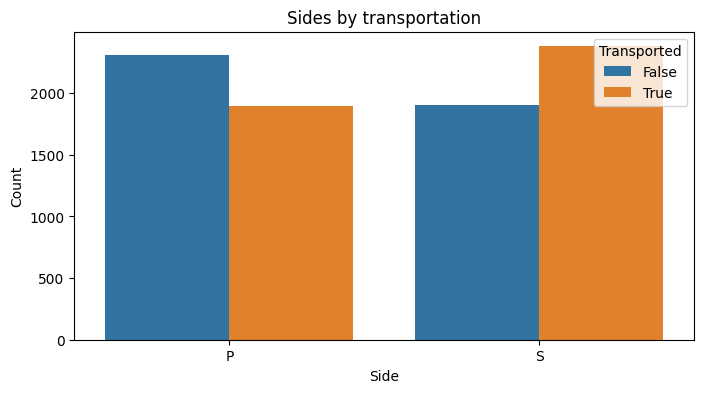

In [25]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df , x='Side' , hue = 'Transported')
plt.title('Sides by transportation' )
plt.ylabel('Count')
plt.show()

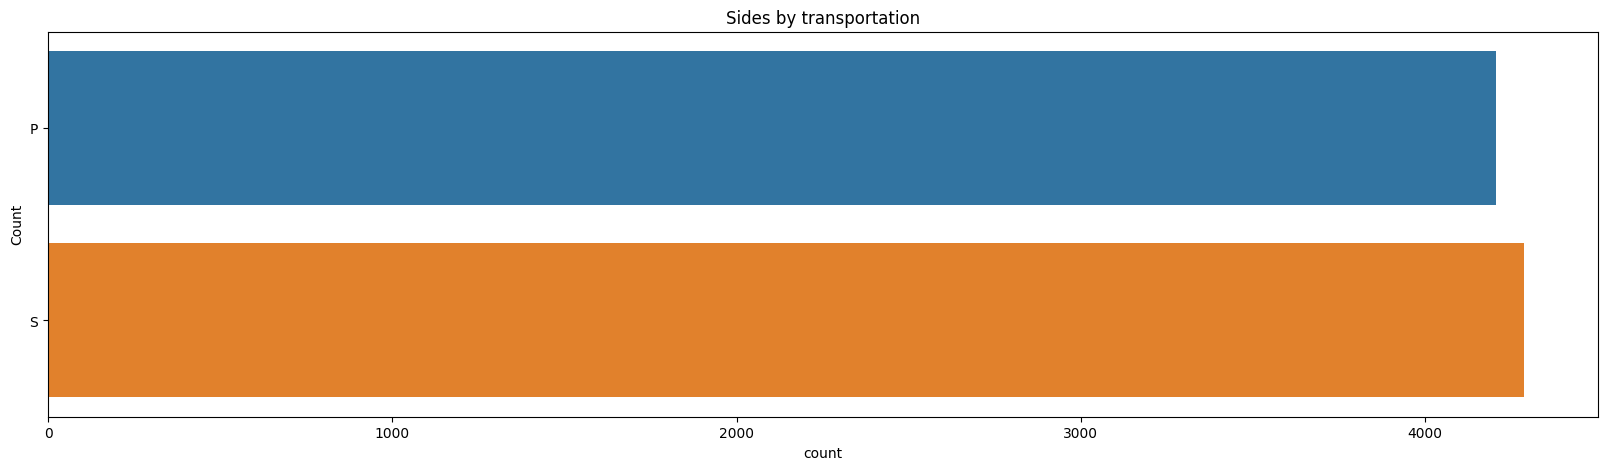

In [26]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df , y='Side')
plt.title('Sides by transportation' )
plt.ylabel('Count')
plt.show()

In [27]:
data.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

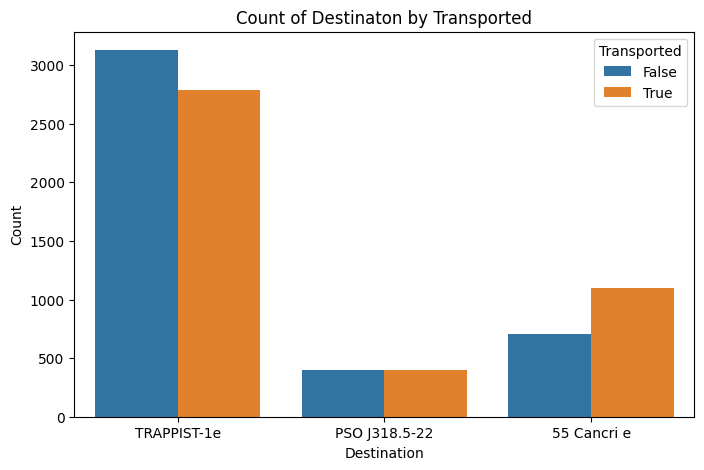

In [28]:
plt.figure(figsize =(8,5))
sns.countplot(data=df , x='Destination' , hue='Transported')
plt.title('Count of Destinaton by Transported')
plt.ylabel('Count')
plt.show()

In [29]:
# most of the people are from Earth ,almost ~70% people from europa survived whereas ~50% people from mars survived and less than 40% survived from planet earth
# People with Cryosleep have Mostlikely Survived
# Being Vip havent played any crucial role
# Most of the people are from Deck F and G  i.e. assuming Deck A are for VIP  where Deck B,C  RIch Class and Deck D,E Middle Class and Deck F,G Lower Class and Deck T Crew Class
# Here Survival Rate is baised accoridng to class
# Survival Rate on Side S is little higher
# People Whose Destination is CAncri have 60% Survial Rate

# **1. Data Cleaning**

In [30]:
df.drop(['PassengerId','Name'],axis =1,inplace=True)

In [31]:
test1 = test.drop(['PassengerId','Name'],axis =1)

In [32]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Side            199
Total_Spends      0
dtype: int64

In [33]:
df.shape

(8693, 15)

In [34]:
df.dropna(inplace=True)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Total_Spends
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,8536.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1873.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,4637.0


In [35]:
df.shape

(6764, 15)

In [36]:
df.reset_index(inplace = True,drop= True)

> # In order to remove the outlier we will seprate numerical data form original data >>>

In [37]:
numerical_data  = [col for col in df.columns if df[col].dtypes == float]
numerical_data.remove('Age')
numerical_data

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Spends']

> #   Now we will remove outliers in 3 steps :
>   1. Define function to remove outlier which will return thier index .
>   2. Next we use fir loop to iterate through numerical_data and extend our index_list
>   3. Finally we will define the function which will drop that index by using df.drop(index,inplace=True)

In [38]:
def outlier(df,ft) :
    upper_limit = df[ft].mean() + 3*df[ft].std()
    lower_limit = df[ft].mean() - 3*df[ft].std()
    ls =  df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
    return ls

In [39]:
index = []
for col in numerical_data :
    index.extend(outlier(df,col))
index = sorted(set(index))

In [40]:
def remove_outlier(df,ls) :
    df = df.drop(ls,inplace = True)
    return df 

In [41]:
remove_outlier(df,index)
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Total_Spends
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,P,774.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False,A,P,1231.0
6760,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,0.0
6761,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1873.0
6762,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,4637.0


> # Now We Head on to categorical data >>>>>

In [42]:
categorical_data =[col for col in df.columns if df[col].dtypes == object]
categorical_data

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Deck', 'Side']

In [43]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [44]:
df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [45]:
df.drop('Cabin',axis = 1,inplace = True)

In [46]:
test1.drop('Cabin' , axis= 1 , inplace = True) #dropping cabin from test

In [47]:
categorical_data =[col for col in df.columns if df[col].dtypes == object]
categorical_data

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

In [48]:
categorical_data_test =[col for col in df.columns if df[col].dtypes == object]
categorical_data_test

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

> # Now We will use OneHotEncoder to convert the categorical data into numerical data >>>

In [49]:
from sklearn.preprocessing import OneHotEncoder
data = df[categorical_data]

ohe = OneHotEncoder(categories='auto')

feature_arr = ohe.fit_transform(data).toarray()

ohe_labels = ohe.get_feature_names_out(categorical_data)

features = pd.DataFrame(
               feature_arr,
               columns=ohe_labels)
features

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6187,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6188,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6189,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


> # And Finally we will create a final_data using df_num and categorical_data >>>

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
df_num = df.select_dtypes(float)
df_num.reset_index(inplace=True , drop = True)
final_data = pd.concat([df_num,features],axis= 1)
final_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spends,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,16.0,303.0,70.0,151.0,565.0,2.0,1091.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,44.0,0.0,483.0,0.0,291.0,0.0,774.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,32.0,1.0,1146.0,0.0,50.0,34.0,1231.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6187,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6188,26.0,0.0,0.0,1872.0,1.0,0.0,1873.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6189,32.0,0.0,1049.0,0.0,353.0,3235.0,4637.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **2. Feature Engineering**

> # Now let's move to test data here as you know we cant drop the data soo here on numerical_data we will use mean() data to fillna and for categorical data we will use most frequent value to fillna . Let's see how we do it

In [52]:
test1.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Deck            100
Side            100
Total_Spends      0
dtype: int64

In [53]:
test1['Age'].fillna(test1['Age'].mean(),inplace= True)
test1['Spa'].fillna(test1['Spa'].mean(),inplace= True)
test1['VRDeck'].fillna(test1['VRDeck'].mean(),inplace= True)
test1['FoodCourt'].fillna(test1['FoodCourt'].mean(),inplace= True)
test1['ShoppingMall'].fillna(test1['ShoppingMall'].mean(),inplace= True)
test1['RoomService'].fillna(test1['RoomService'].mean(),inplace= True)

/tmp/ipykernel_17/2023110260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test1['Age'].fillna(test1['Age'].mean(),inplace= True)
/tmp/ipykernel_17/2023110260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [54]:
# Fillna in Deck
test1.loc[(test1.Total_Spends >= 0) & (test1.Total_Spends <= 500), 'Deck'] = test1['Deck'].fillna('G')
test1.loc[(test1.Total_Spends >= 500) & (test1.Total_Spends <= 1000), 'Deck'] = test1['Deck'].fillna('F')
test1.loc[(test1.Total_Spends >= 1000) & (test1.Total_Spends <= 1500), 'Deck'] = test1['Deck'].fillna('C')
test1.loc[test1.Total_Spends >= 1500, 'Deck'] = test1['Deck'].fillna('A')

In [55]:
test1['Side'].fillna('S',inplace=True)

/tmp/ipykernel_17/980145262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test1['Side'].fillna('S',inplace=True)


In [56]:
test1.isnull().sum()

HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Deck             0
Side             0
Total_Spends     0
dtype: int64

In [57]:
test1['HomePlanet'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4277 entries, 0 to 4276
Series name: HomePlanet
Non-Null Count  Dtype 
--------------  ----- 
4190 non-null   object
dtypes: object(1)
memory usage: 33.5+ KB


In [58]:
test1['HomePlanet'].fillna('Earth',inplace=True)
test1['CryoSleep'].fillna( False ,inplace = True)
test1['VIP'].fillna(False,inplace = True)
test1['Destination'].fillna('TRAPPIST-1e',inplace = True)

/tmp/ipykernel_17/2729069503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test1['HomePlanet'].fillna('Earth',inplace=True)
/tmp/ipykernel_17/2729069503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [59]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   bool   
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   bool   
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  Deck          4277 non-null   object 
 11  Side          4277 non-null   object 
 12  Total_Spends  4277 non-null   float64
dtypes: bool(2), float64(7), object(4)
memory usage: 376.0+ KB


> # Here we will convert categorical test data into numerical data >>>

In [60]:
data_test = test1[categorical_data_test]

ohe = OneHotEncoder(categories='auto')

feature_arr_test = ohe.fit_transform(data_test).toarray()

ohe_labels_test = ohe.get_feature_names_out(categorical_data_test)

features_test = pd.DataFrame(
               feature_arr_test,
               columns=ohe_labels_test)
features_test

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4273,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4274,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


> # And After that concat num_test data and cat_test data into final_test_data

In [61]:
test_data = pd.concat([test1.select_dtypes(float),features_test],axis  = 1)
test_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spends,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,2832.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,7418.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,20.000000,10.0,0.0,635.0,0.0,0.0,645.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,1018.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4274,28.658146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,3203.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
X = final_data
y = df['Transported'].astype(int)

In [63]:
X.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Total_Spends', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P',
       'Side_S'],
      dtype='object')

In [64]:
numeric_col =['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Total_Spends']
dummy_col = ['HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P',
       'Side_S']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scale only numerical columns
X_scaled_numerical = scaler.fit_transform(X[numeric_col])

# Convert scaled numerical data back to a DataFrame
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numeric_col)

# Concatenate scaled numerical data with dummy variables
X_Scaled = pd.concat([X_scaled_numerical_df, X[dummy_col].reset_index(drop=True)], axis=1)

In [66]:
X_Scaled

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spends,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0.723455,-0.421526,-0.338487,-0.397010,-0.359747,-0.355805,-0.697718,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.301452,-0.124237,-0.326602,-0.319878,0.782617,-0.257726,-0.108852,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.313493,-0.421526,1.355845,0.747634,6.567265,0.074406,3.443542,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.848069,0.404883,-0.246045,0.068869,0.815910,-0.351347,0.175179,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.065091,-0.421526,0.299364,-0.397010,0.245768,-0.355805,-0.078449,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,0.245165,-0.418798,1.174923,-0.397010,-0.255707,-0.280017,0.287192,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6187,-0.711415,-0.421526,-0.338487,-0.397010,-0.359747,-0.355805,-0.697718,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6188,-0.164797,-0.421526,-0.338487,5.378658,-0.357666,-0.355805,0.800849,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6189,0.245165,-0.421526,1.046824,-0.397010,0.374778,6.855249,3.012294,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **3.Model Selection**

> # Now we will select our best two models using cross_val_score

In [67]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [68]:
print(f'model_score : {np.mean(cross_val_score(LogisticRegression(max_iter=500),X,y,cv=10))}')
print(f'model_scaled_data_score : {np.mean(cross_val_score(LogisticRegression(max_iter=500),X_Scaled,y,cv=10))}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

model_score : 0.7812968367293762
model_scaled_data_score : 0.7816196779404867


In [69]:
print(f'model_score : {np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10))}')
print(f'model_scaled_data_score : {np.mean(cross_val_score(DecisionTreeClassifier(),X_Scaled,y,cv=10))}')

model_score : 0.7270248579915577
model_scaled_data_score : 0.727994163322737


In [70]:
print(f'model_score : {np.mean(cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=10))}')
print(f'model_scaled_data_score : {np.mean(cross_val_score(RandomForestClassifier(n_estimators=40),X_Scaled,y,cv=10))}')

model_score : 0.7858186982125176
model_scaled_data_score : 0.7875970608160926


In [71]:
print(f'model_score : {np.mean(cross_val_score(SVC(),X,y,cv=10))}')
print(f'model_scaled_data_score : {np.mean(cross_val_score(SVC(),X_Scaled,y,cv=10))}')

model_score : 0.7838808692480067
model_scaled_data_score : 0.7945419250612329


In [72]:
print(f'model_score : {np.mean(cross_val_score(GaussianNB(),X,y,cv=10))}')
print(f'model_scaled_data_score : {np.mean(cross_val_score(GaussianNB(),X_Scaled,y,cv=10))}')

model_score : 0.7643381624889259
model_scaled_data_score : 0.7636927406326542


In [73]:
print(f'model_score : {np.mean(cross_val_score(XGBClassifier(),X,y,cv=10))}')
print(f'model_scaled_data_score : {np.mean(cross_val_score(XGBClassifier(),X_Scaled,y,cv=10))}')

model_score : 0.7942190838501224
model_scaled_data_score : 0.7942190838501224


In [74]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# **4. HyperParamter Optimization**

> # Here LogisticRegression and Random Forest are performing best soo using this we implement HyperParamter Optimization on this two models >>

In [75]:
model_params = {
    'XGBClassifier': {
        'model': XGBClassifier(solver='liblinear'), 
        'params': {
            'max_depth': [1,5, 10 , 30],
            'learning_rate': [0.01, 0.001, 0.1],
            'n_estimators': [200,300 ,500],
            'min_child_weight': [0,1,5,10],
            'gamma': [0.001, 0.1],
            'subsample': [ 1.0,1.5,2.0],
            'colsample_bytree': [0.7, 0.8,0.9]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [1, 5, 10],  # Regularization parameter
            'kernel': ['linear', 'rbf'],  # Specify the kernel type
            'gamma': ['scale', 'auto']  # Kernel coefficient
        }
    }
}

In [76]:
'''# Example for XGBClassifier
from sklearn.model_selection import GridSearchCV
grid_xgb = GridSearchCV(estimator=model_params['XGBClassifier']['model'],
                         param_grid=model_params['XGBClassifier']['params'],
                         scoring='accuracy', 
                         cv=3)

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

grid_xgb.fit(X,y)
'''

"# Example for XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\ngrid_xgb = GridSearchCV(estimator=model_params['XGBClassifier']['model'],\n                         param_grid=model_params['XGBClassifier']['params'],\n                         scoring='accuracy', \n                         cv=3)\n\nimport warnings\nwarnings.filterwarnings('ignore', category=UserWarning)\n\ngrid_xgb.fit(X,y)\n"

In [77]:
'''print(f'Best Params using xgb : {grid_xgb.best_params_}')
print(f'Best Score using xgb : {grid_xgb.best_score_}')'''

"print(f'Best Params using xgb : {grid_xgb.best_params_}')\nprint(f'Best Score using xgb : {grid_xgb.best_score_}')"

In [78]:
'''grid_svc = GridSearchCV(estimator=model_params['SVC']['model'],
                         param_grid=model_params['SVC']['params'],
                         scoring='accuracy', 
                         cv=3)
grid_svc.fit(X_Scaled,y)'''

"grid_svc = GridSearchCV(estimator=model_params['SVC']['model'],\n                         param_grid=model_params['SVC']['params'],\n                         scoring='accuracy', \n                         cv=3)\ngrid_svc.fit(X_Scaled,y)"

In [79]:
'''print(f'Best Params using svc : {grid_svc.best_params_}')
print(f'Best Score using svc : {grid_svc.best_score_}')
'''

"print(f'Best Params using svc : {grid_svc.best_params_}')\nprint(f'Best Score using svc : {grid_svc.best_score_}')\n"

In [80]:
'''from sklearn.model_selection import GridSearchCV
score = []
for model_name , mp in model_params.items() :
    clf = GridSearchCV(mp['model'],mp['params'],cv =5,return_train_score=False)
    clf.fit(X,y)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
score'''

"from sklearn.model_selection import GridSearchCV\nscore = []\nfor model_name , mp in model_params.items() :\n    clf = GridSearchCV(mp['model'],mp['params'],cv =5,return_train_score=False)\n    clf.fit(X,y)\n    score.append({\n        'model' : model_name,\n        'best_score' : clf.best_score_,\n        'best_params' : clf.best_params_\n    })\nscore"

# **5. Final model Training**

> # After Implementing Parameter tunnning we can see logistic Regresssion is giving best results so let's call and fit the model >>>

In [81]:
model = XGBClassifier(colsample_bytree = 0.8, gamma = 0.1, learning_rate= 0.1, max_depth= 5, min_child_weight =1, n_estimators = 200, subsample = 1.0)
model.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
prediction = model.predict(test_data)
model.score(X,y)

0.8604425779357131

In [83]:
d = {'PassengerId' : np.array(test.PassengerId) , 'Transported' : np.array(prediction.astype(bool)) }

In [84]:
submit= pd.DataFrame(d)

In [85]:
submit

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [86]:
submit.to_csv('\Prediction.csv', index=False)